#                                      DISNEYLAND DREAMS - Analyzing Sentiments and Creating Personalized Chatbot Experiences

This project titled, “DISNEYLAND DREAMS – Analyzing Sentiments and creating Personalized Chatbot Experiences” aims in leveraging Natural Language Processing techniques to analyze customer sentiments expressed in textual data such as reviews and feedback with respect to Disneyland Park locations. 

This analysis aims to gain insights on visitor perceptions, emotions, and preferences regarding attractions and experiences at Disneyland locations in California, Paris, and Hong Kong. It can be accomplished by delving into the architecture of neural network model for understanding and predicting the user emotions from text messages.

It is an important factor when it comes to monitoring Customer Satisfaction, Brand Reputation management, Predictive Analytics on future trends and personalized customer experience.

## Sentiment Analysis using various Machine Learning models:¶

**Importing basic libraries**:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Defining Disney dataset**:

In [3]:
# Reading the Cleaned CSV file that is created as part of Exploratory Data Analysis
disneydf = pd.read_csv(r'C:\Users\priya\Downloads\Projectwork\Cleaned_Disneydf.csv')   
disneydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive
...,...,...,...,...,...,...,...
42629,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Positive
42630,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Positive
42631,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive
42632,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive


In [4]:
disneydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42634 entries, 0 to 42633
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42634 non-null  int64 
 1   Rating             42634 non-null  int64 
 2   Year_Month         42634 non-null  object
 3   Reviewer_Location  42634 non-null  object
 4   Review_Text        42634 non-null  object
 5   Branch             42634 non-null  object
 6   Sentiment          42634 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.3+ MB


In [5]:
# To identify the number of rows and columns in a dataset
disneydf.shape

(42634, 7)

In [6]:
# Check for null values
disneydf.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
Sentiment            0
dtype: int64

In [7]:
disneydf['Sentiment'].value_counts()

Positive    39008
Negative     3626
Name: Sentiment, dtype: int64

# Machine Learning Sentiment Analysis using various models:

**1. Data Pre-processing:**

In [9]:
# Creating a balanced dataset by taking just 5000 positive sentiment samples for better predictions 
positive_sentiment = disneydf[disneydf['Sentiment'] == 'Positive']
positive_samples = positive_sentiment.sample(4000,random_state=123)
positive_samples

negative_sentiment = disneydf[disneydf['Sentiment'] == 'Negative']

#neutral_sentiment = disneydf[disneydf['Sentiment'] == 'Neutral']
#neutral_samples = neutral_sentiment.sample(3000,random_state=123)
#neutral_samples

In [10]:
balanced_data = pd.concat([positive_samples,negative_sentiment],axis=0)

# To remove unwanted columns from a dataset that are no longer useful for prediction
balanced_data.drop(columns=['Review_ID','Year_Month','Reviewer_Location'],inplace=True,axis=1)
balanced_data.shape

balanced_data.reset_index(drop=True,inplace=True)
balanced_data

,Rating,Review_Text,Branch,Sentiment
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive
...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative


In [11]:
balanced_data['Sentiment'].value_counts()

Positive    4000
Negative    3626
Name: Sentiment, dtype: int64

In [12]:
balanced_data.isnull().sum()

Rating         0
Review_Text    0
Branch         0
Sentiment      0
dtype: int64

In [15]:
balanced_data.shape

(7626, 4)

In [20]:
# To check for the number of Positive and Negative reviews that are present across different locations
balanced_data_branch_sentiment= balanced_data.groupby(['Branch','Sentiment']).size().unstack()
balanced_data_branch_sentiment

Sentiment,Negative,Positive
Branch,,
Disneyland_California,1246,1872
Disneyland_HongKong,508,908
Disneyland_Paris,1872,1220


In [22]:
# To check for the maximum number number of Positive and Negative reviews that are present across different locations
# Output shows Disneyland_Paris has more number of Negative reviews and Disneyland_California has more number of Positive reviews

balanced_data_branch_sentiment_max= balanced_data.groupby(['Branch','Sentiment']).size().unstack().idxmax()
balanced_data_branch_sentiment_max

Sentiment
Negative         Disneyland_Paris
Positive    Disneyland_California
dtype: object

**Text Pre-processing:**
 

Steps to clean and prepare the raw text data for sentiment analysis:
1. Tokenization: Split the text into individual words or tokens
2. Lowercasing: Convert all text to lowercase to ensure consistency
3. Removing Punctuation and Special Characters: Remove any non-alphanumeric characters
4. Stemming or Lemmatization: Reduce words to their base or root form
5. Joining Tokens: Join the individual tokens back into sentences or documents

In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

text_tokens = [word_tokenize(sentence) for sentence in balanced_data['Review_Text']]

text_lower = [[word.lower() for word in sentence] for sentence in text_tokens]

text_clean = [[re.sub(r'[^a-zA-Z]', '', word) for word in sentence] for sentence in text_lower]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
text_no_stopwords = [[word for word in sentence if word not in stop_words] for sentence in text_clean]
text_no_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['better',
  'expected',
  'time',
  '',
  'year',
  'old',
  'girl',
  '',
  'infant',
  'son',
  '',
  'wife',
  'parentsmy',
  'daughter',
  'loved',
  'princess',
  'faire',
  'attended',
  'events',
  'almost',
  'daily',
  '',
  'wearing',
  'snow',
  'white',
  'dress',
  '',
  'intention',
  'go',
  'th',
  'birthday',
  'able',
  'remember',
  'turned',
  'perfect',
  'age',
  'really',
  'excited',
  'see',
  'princesses',
  '',
  'highlights',
  '',
  'us',
  '',
  '',
  'daily',
  'sylvania',
  'parade',
  'watched',
  'afternoon',
  'show',
  'fine',
  '',
  'evening',
  'show',
  'late',
  'little',
  'onesfantasyland',
  'loved',
  'outside',
  'rides',
  'mostly',
  'teacup',
  'ride',
  '',
  'dumbo',
  '',
  'casey',
  'jr',
  'train',
  '',
  'carousel',
  'especiallyphotopass',
  '',
  '',
  'get',
  'cd',
  'unlimited',
  'photos',
  'taken',
  'photographers',
  'stationed',
  'main',
  'landmarks',
  '',
  'eg',
  '',
  'cinderella',
  'castle',
  '',
  'various

In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

text_stemmed = [[stemmer.stem(word) for word in sentence] for sentence in text_no_stopwords]
text_stemmed

stemmed_text_data = [' '.join(sentence) for sentence in text_stemmed]
balanced_data['Stemmed_Text'] = stemmed_text_data
balanced_data

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive,better expect time year old girl infant son ...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive,truli disney place showcas disney charact lo...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive,wife visit disneyland park start novemb ever ...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive,say time worst yet level ride closur peak s...
...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative,start say comment around non disney thing most...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative,disneyland great place spend time children rea...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative,first trip disneyland pleasantli surpris much ...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative,line low that good staff rude guess that eu...


In [26]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

text_lemmatized = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in text_no_stopwords]
text_lemmatized

lemmatized_text_data = [' '.join(sentence) for sentence in text_lemmatized]
lemmatized_text_data
balanced_data['Lemmatized_Text'] = lemmatized_text_data
balanced_data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


In [30]:
# Select any record to check on the text differences between Stemming and Lemmatization
balanced_data.iloc[0]

Rating                                                             4
Review_Text        Had a better than expected time with my 2.5 ye...
Branch                                         Disneyland_California
Sentiment                                                   Positive
Stemmed_Text       better expect time  year old girl  infant son ...
Lemmatized_Text    better expected time  year old girl  infant so...
Name: 0, dtype: object

In [31]:
# Replace to numerical values to make the machine learning models for better computation
balanced_data["Sentiment"].replace({"Negative": 0, "Positive":1}, inplace =True)
balanced_data

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,1,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,1,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,1,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,1,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,1,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,0,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,0,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,0,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,0,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


In [32]:
# Loading the balanced data in a CSV file for further use by machine learning and deep learning models 
# for further analysis
balanced_data.to_csv(r'C:\Users\priya\Downloads\Projectwork\Balanced_Disneydf.csv', index=False)

# Trying to read the cleaned and balanced CSV file that is loaded in the local drive
balanced_disneydf = pd.read_csv(r'C:\Users\priya\Downloads\Projectwork\Balanced_Disneydf.csv')  
balanced_disneydf

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,1,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,1,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,1,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,1,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,1,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,0,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,0,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,0,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,0,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


In [33]:
balanced_disneydf['Rating'].value_counts()

5    2379
2    2127
1    1499
4    1133
3     488
Name: Rating, dtype: int64

#### Train Test Split:

In [99]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [96]:
# Creating two object 'X' and 'y' to perform train_test_split and use different machine learning models
X= balanced_disneydf['Stemmed_Text']
y= balanced_disneydf['Sentiment']
y.value_counts()

1    4000
0    3626
Name: Sentiment, dtype: int64

In [143]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

## Bag of words model:

**This model is used to convert text documents to numerical vectors or bag of words.**

In [144]:
vectorizer = CountVectorizer() 
vectorized_training_data = vectorizer.fit_transform(X_train)
vectorized_test_data = vectorizer.transform(X_test)

print( "Bag Of Words - Training data input: "  , X_train.shape)
print( "Bag Of Words - Test data input: "      , X_test.shape)
print("\n")

print( "Bag Of Words - Vectorized training data input: "     , vectorized_training_data.shape)
print( "Bag Of Words - Training data output: "               , y_train.shape)
print("\n")

print( "Bag Of Words - Vectorized Test data input: "     , vectorized_test_data.shape)
print( "Bag Of Words - Test data output: "               , y_test.shape)

Bag Of Words - Training data input:  (6100,)
Bag Of Words - Test data input:  (1526,)


Bag Of Words - Vectorized training data input:  (6100, 16385)
Bag Of Words - Training data output:  (6100,)


Bag Of Words - Vectorized Test data input:  (1526, 16385)
Bag Of Words - Test data output:  (1526,)


## Term Frequency-Inverse Document Frequency model (TF-IDF):

In [145]:
# Tfidf vectorizer
tf = TfidfVectorizer()
wghted_training_data = tf.fit_transform(X_train)
wghted_test_data = tf.transform(X_test)

print( "Weighted Training data Input:"  , wghted_training_data.shape)
print( "Weighted Test data Input:"      , wghted_test_data.shape)

Weighted Training data Input: (6100, 16385)
Weighted Test data Input: (1526, 16385)


## Logistic Regression model training and performance using Bag of Words and TF-IDF features:

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score

# training the model
lr_model = LogisticRegression(penalty='l2', solver = 'liblinear', max_iter=1000, C=0.4, random_state=123)
#logModel = LogisticRegression(multi_class='multinomial')

In [124]:
# Build Logistic Regression with Hyperparameter tuning
#param_grid = [    
#    {'penalty' : ['l1', 'l2'],
#    'C' : np.logspace(-4, 4, 20),
#    'solver' : ['lbfgs','saga'],
#    'max_iter' : [100, 1000,2500]
#    }
#]

In [87]:
#from sklearn.model_selection import GridSearchCV

#clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [88]:
#best_clf = clf.fit(vectorized_training_data, y_train)
#best_clf.best_estimator_

#print (f'Accuracy - : {best_clf.score(X,y):.3f}')

In [147]:
# Fitting the model for Bag of words
lr_model.fit(vectorized_training_data, y_train)

# Predicting the model for bag of words
y_predict = lr_model.predict(vectorized_test_data)

In [148]:
# Fitting the model for tfidf features
lr_model.fit(wghted_training_data, y_train)

# Predicting the model for tfidf features
lr_tfidf_predict = lr_model.predict(wghted_test_data)

In [149]:
# Determining the R square score for training and test dataset is mainly to assess the potential Overfitting or Underfitting
print("Bag Of Words- Training data score", lr_model.score(vectorized_training_data, y_train))
print("Bag Of Words- Testing data score", lr_model.score(vectorized_test_data, y_test))
print("\n")
print("TF-IDF - Training data score", lr_model.score(wghted_training_data, y_train))
print("TF-IDF - Testing data score", lr_model.score(wghted_test_data, y_test))

Bag Of Words- Training data score 0.8745901639344262
Bag Of Words- Testing data score 0.8538663171690695


TF-IDF - Training data score 0.9029508196721312
TF-IDF - Testing data score 0.8709043250327654


**Accuracy of the model:**

In [154]:
# Accuracy score for bag of words
lr_bow_score = accuracy_score(y_test, y_predict)
print("Logistic Regression model accuracy using Bag of Words:",lr_bow_score)

# Accuracy score for tfidf features
lr_tfidf_score = accuracy_score(y_test, lr_tfidf_predict)
print("Logistic Regression model accuracy using TF-IDF :",lr_tfidf_score)

Logistic Regression model accuracy using Bag of Words: 0.8682830930537353
Logistic Regression model accuracy using TF-IDF : 0.8709043250327654


**Plot the ROC Curve:**

In [155]:
# Predict probabilities on the BoW test set
y_pred_prob = lr_model.predict_proba(vectorized_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

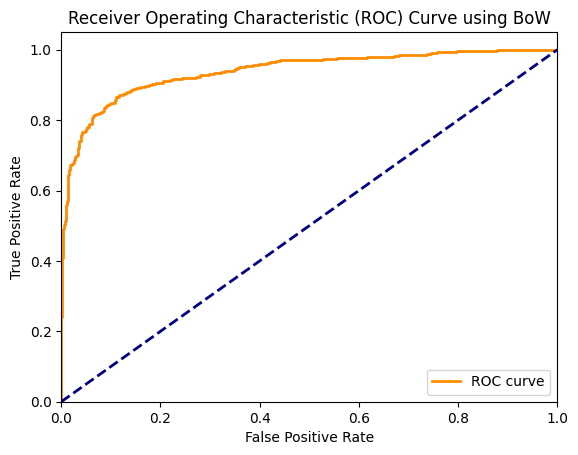

In [161]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using BoW')
plt.legend(loc="lower right")
plt.show()

In [156]:
# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

ROC-AUC: 0.92


In [180]:
# Predict probabilities on the TF-IDF test set
y_pred_prob1 = lr_model.predict_proba(wghted_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1)

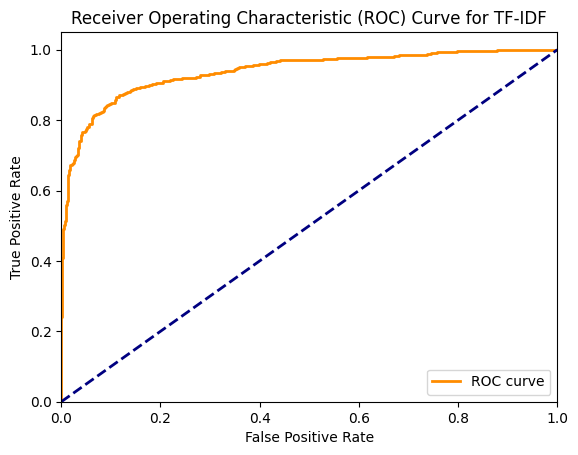

In [181]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for TF-IDF')
plt.legend(loc="lower right")
plt.show()

In [182]:
# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_prob1)
print(f'ROC-AUC: {roc_auc:.2f}')

ROC-AUC: 0.94


**Classification Report:**

In [164]:
# Classification report for bag of words 
lr_bow_report = classification_report(y_test, y_predict)
print(lr_bow_report)

# Classification report for tfidf features
lr_tfidf_report = classification_report(y_test, lr_tfidf_predict)
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       703
           1       0.88      0.87      0.88       823

    accuracy                           0.87      1526
   macro avg       0.87      0.87      0.87      1526
weighted avg       0.87      0.87      0.87      1526

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       703
           1       0.90      0.85      0.88       823

    accuracy                           0.87      1526
   macro avg       0.87      0.87      0.87      1526
weighted avg       0.87      0.87      0.87      1526



**Confusion Matrices:**

Confusion Matrix for Bag of Words:
[[607  96]
 [105 718]]


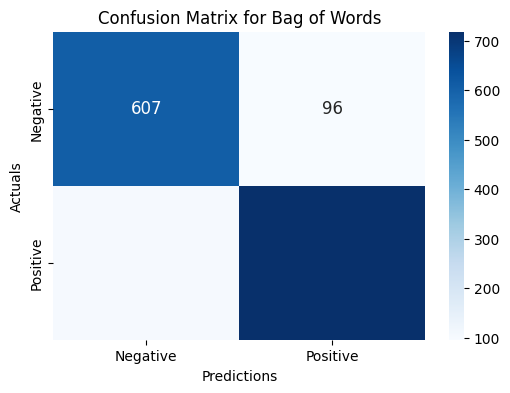

In [165]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for bag of words
cm = confusion_matrix(y_test, y_predict)

class_labels = ["Negative","Positive"]

# Print confusion matrix
print("Confusion Matrix for Bag of Words:")
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for Bag of Words')
plt.show()

Confusion Matrix for TF-IDF:
[[627  76]
 [121 702]]


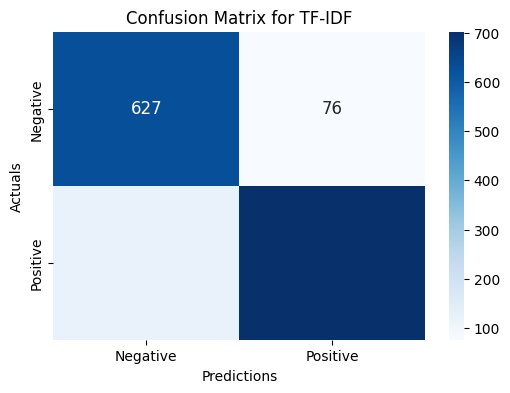

In [166]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for bag TF-IDF
cm = confusion_matrix(y_test, lr_tfidf_predict)

class_labels = ["Negative","Positive"]

# Print confusion matrix
print("Confusion Matrix for TF-IDF:")
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

## Multinomial Naive Bayes using Bag of Words and TF-idf features:

In [173]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import GridSearchCV

mnb= MultinomialNB(alpha=1)  # Default alpha value

#param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
#clf = GridSearchCV(mnb, param, scoring='roc_auc', cv=10, return_train_score=True)

#clf.fit(vectorized_training_data, y_train)

#best_alpha = clf.best_params_['alpha']
#best_model = clf.best_estimator_

#print("Best alpha:", best_alpha)
#print("Best model:", best_model)

In [174]:
# Fitting the model for Bag of words
mnb.fit(vectorized_training_data, y_train)

# Predicting the model for bag of words
mnb_bow_predict = mnb.predict(vectorized_test_data)

In [175]:
# Fitting the model for tfidf features
mnb.fit(wghted_training_data, y_train)

# Predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(wghted_test_data)

In [176]:
print(mnb.score(vectorized_training_data, y_train))
print(mnb.score(vectorized_test_data, y_test))
print("\n")
print(mnb.score(wghted_training_data, y_train))
print(mnb.score(wghted_test_data, y_test))

0.9032786885245901
0.8610747051114024


0.9154098360655738
0.8577981651376146


In [187]:
# Accuracy score for bag of words
mnb_bow_score = accuracy_score(y_test, mnb_bow_predict)
print("Multinomial Naive Bayes model accuracy using Bag of Words:",mnb_bow_score)

# Accuracy score for TF-IDF
mnb_tfidf_score = accuracy_score(y_test, mnb_tfidf_predict)
print("Multinomial Naive Bayes model accuracy using TF-IDF:",mnb_tfidf_score)

Multinomial Naive Bayes model accuracy using Bag of Words: 0.8486238532110092
Multinomial Naive Bayes model accuracy using TF-IDF: 0.8577981651376146


In [189]:
# Predict probabilities
y_nbpredict_proba  = mnb.predict_proba(vectorized_test_data)[:, 1] 
y_nbpredict_proba1 = mnb.predict_proba(wghted_test_data)[:, 1] 

In [247]:
# ROC-AUC score
nb_roc_auc = roc_auc_score(y_test, y_nbpredict_proba)
print("ROC-AUC Score:", nb_roc_auc)

ROC-AUC Score: 0.9192663277845858


In [248]:
# ROC-AUC score
nb_roc_auc1 = roc_auc_score(y_test, y_nbpredict_proba1)
print("ROC-AUC Score:", nb_roc_auc1)

ROC-AUC Score: 0.9267070997581965


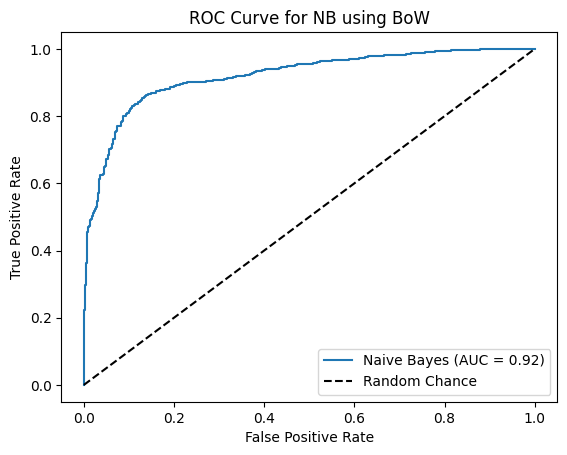

In [249]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_nbpredict_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NB using BoW')
plt.legend(loc='lower right')
plt.show()

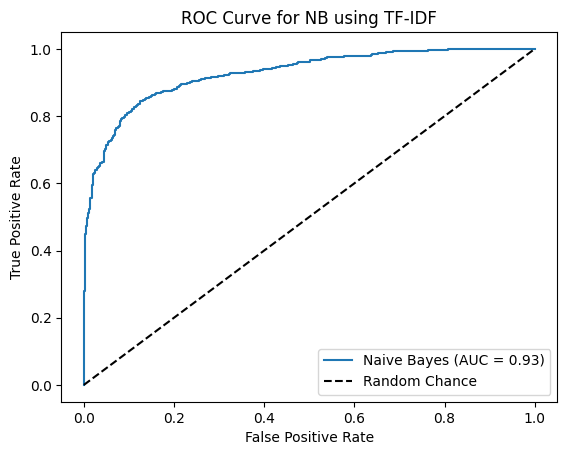

In [250]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_nbpredict_proba1)
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {nb_roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NB using TF-IDF')
plt.legend(loc='lower right')
plt.show()

**Classification Report:**

In [197]:
# Classificaion report for Bag of words
mnb_bow_report = classification_report(y_test, mnb_bow_predict)
print("Classfication Report for MNB Bag of Words:\n",mnb_bow_report)

# Classification report for tfidf features
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict)
print("Classfication Report for MNB-TF-IDF:\n",mnb_tfidf_report)

Classfication Report for MNB Bag of Words:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       703
           1       0.87      0.84      0.86       823

    accuracy                           0.85      1526
   macro avg       0.85      0.85      0.85      1526
weighted avg       0.85      0.85      0.85      1526

Classfication Report for MNB-TF-IDF:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       703
           1       0.88      0.85      0.87       823

    accuracy                           0.86      1526
   macro avg       0.86      0.86      0.86      1526
weighted avg       0.86      0.86      0.86      1526



**Confusion Matrices:**

Confusion Matrix for MNB using Bag of Words:
[[603 100]
 [131 692]]


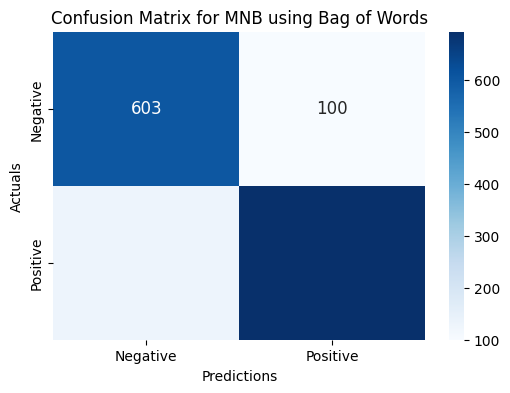

In [198]:
# Compute confusion matrix for MNB bag of words
mnb_bow_cm = confusion_matrix(y_test, mnb_bow_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for MNB using Bag of Words:")
print(mnb_bow_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(mnb_bow_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for MNB using Bag of Words')
plt.show()

Confusion Matrix for MNB using TF-IDF:
[[608  95]
 [122 701]]


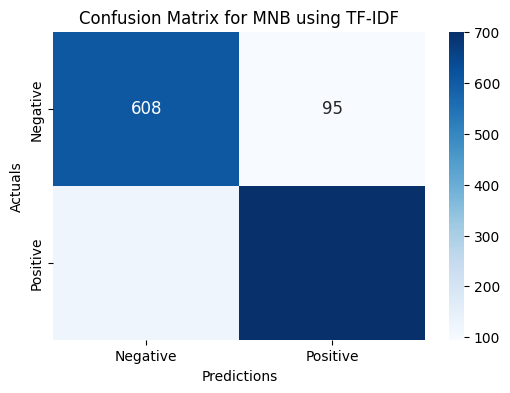

In [199]:
# Compute confusion matrix for MNB TF-IDF
mnb_tfidf_cm = confusion_matrix(y_test, mnb_tfidf_predict)

class_labels = ["Negative","Positive"]

# Print confusion matrix
print("Confusion Matrix for MNB using TF-IDF:")
print(mnb_tfidf_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(mnb_tfidf_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for MNB using TF-IDF')
plt.show()

## Support Vector Machine model training and evaluation using Bag of Words and TF-IDF features:

In [233]:
from sklearn import svm

In [277]:
#Building the Model
svm_model=svm.SVC(kernel='linear', gamma=0.4, C=0.4,probability=True)
#svm_model=svm.SVC(kernel='linear')

In [278]:
# Fitting the model for Bag of words
svm_model.fit(vectorized_training_data, y_train)

# Predicting the model for bag of words
svm_bow_predict = svm_model.predict(vectorized_test_data)

In [279]:
# Fitting the model for tfidf features
svm_model.fit(wghted_training_data, y_train)

# Predicting the model for tfidf features
svm_tfidf_predict = svm_model.predict(wghted_test_data)

In [280]:
print(svm_model.score(vectorized_training_data, y_train))
print(svm_model.score(vectorized_test_data, y_test))
print("\n")
print(svm_model.score(wghted_training_data, y_train))
print(svm_model.score(wghted_test_data, y_test))

0.9019672131147541
0.8669724770642202


0.9272131147540984
0.8774574049803407


In [281]:
# Accuracy score for bag of words
svm_bow_score = accuracy_score(y_test, svm_bow_predict)
print("Support Vector Machine model accuracy using Bag of Words:",svm_bow_score)

# Accuracy score for TF-IDF
svm_tfidf_score = accuracy_score(y_test, svm_tfidf_predict)
print("Support Vector Machine model accuracy using TF-IDF:",svm_tfidf_score)

Support Vector Machine model accuracy using Bag of Words: 0.8433813892529489
Support Vector Machine model accuracy using TF-IDF: 0.8774574049803407


In [239]:
# Predict probabilities for the positive class
y_svmpredict_proba = svm_model.predict_proba(vectorized_test_data)[:, 1]
y_svmpredict_proba1 = svm_model.predict_proba(wghted_test_data)[:, 1]

In [240]:
# ROC-AUC score
svm_roc_auc = roc_auc_score(y_test, y_svmpredict_proba)
print("ROC-AUC Score:", svm_roc_auc)

ROC-AUC Score: 0.9253969708020998


In [242]:
# ROC-AUC score
svm_roc_auc1 = roc_auc_score(y_test, y_svmpredict_proba1)
print("ROC-AUC Score:", svm_roc_auc1)

ROC-AUC Score: 0.9409845670957137


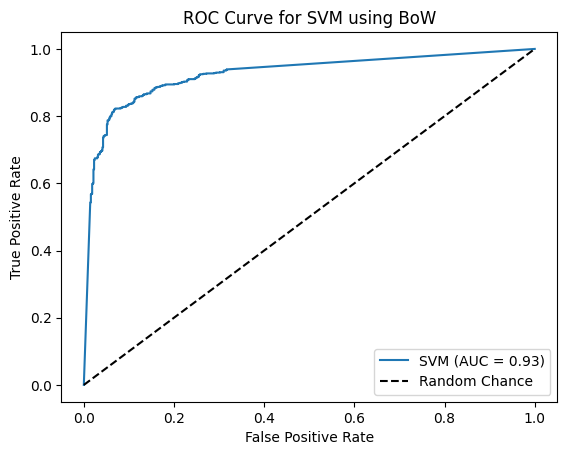

In [282]:
# ROC curve for SVM using BoW
fpr, tpr, _ = roc_curve(y_test, y_svmpredict_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM using BoW')
plt.legend(loc='lower right')
plt.show()

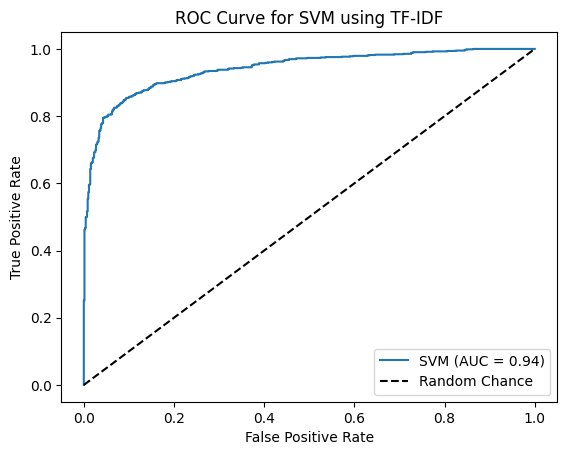

In [283]:
# ROC curve for SVM using TF-IDF
fpr, tpr, _ = roc_curve(y_test, y_svmpredict_proba1)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM using TF-IDF')
plt.legend(loc='lower right')
plt.show()

**Classification Report:**

In [284]:
# Classificaion report for Bag of words
svm_bow_report = classification_report(y_test, svm_bow_predict)
print("Classfication Report for SVM Bag of Words:\n",svm_bow_report)

# Classification report for tfidf features
svm_tfidf_report = classification_report(y_test, svm_tfidf_predict)
print("Classfication Report for SVM-TF-IDF:\n",svm_tfidf_report)

Classfication Report for SVM Bag of Words:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       703
           1       0.86      0.85      0.85       823

    accuracy                           0.84      1526
   macro avg       0.84      0.84      0.84      1526
weighted avg       0.84      0.84      0.84      1526

Classfication Report for SVM-TF-IDF:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       703
           1       0.91      0.85      0.88       823

    accuracy                           0.88      1526
   macro avg       0.88      0.88      0.88      1526
weighted avg       0.88      0.88      0.88      1526



**Confusion Matrix:**

Confusion Matrix for SVM using Bag of Words:
[[588 115]
 [124 699]]


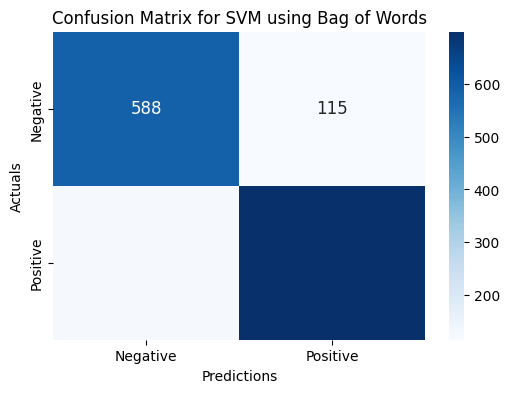

In [285]:
# Compute confusion matrix for SVM bag of words
svm_bow_cm = confusion_matrix(y_test, svm_bow_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for SVM using Bag of Words:")
print(svm_bow_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(svm_bow_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for SVM using Bag of Words')
plt.show()

Confusion Matrix for SVM using TF-IDF:
[[637  66]
 [121 702]]


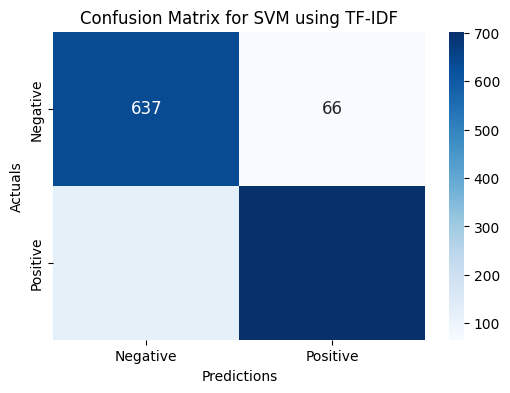

In [286]:
# Compute confusion matrix for SVM using TF-IDF
svm_tfidf_cm = confusion_matrix(y_test, svm_tfidf_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for SVM using TF-IDF:")
print(svm_tfidf_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(svm_tfidf_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for SVM using TF-IDF')
plt.show()

## Decision Trees model training and evaluation using Bag of Words and TF-IDF features:

In [288]:
from sklearn.tree import DecisionTreeClassifier

In [302]:
#Building the Model
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
#dt_model=DecisionTreeClassifier(random_state=42)

In [303]:
# Fitting the model for Bag of words
dt_model.fit(vectorized_training_data, y_train)

# Predicting the model for bag of words
dt_bow_predict = dt_model.predict(vectorized_test_data)

In [304]:
# Fitting the model for tfidf features
dt_model.fit(wghted_training_data, y_train)

# Predicting the model for tfidf features
dt_tfidf_predict = dt_model.predict(wghted_test_data)

In [305]:
print(dt_model.score(vectorized_training_data, y_train))
print(dt_model.score(vectorized_test_data, y_test))
print("\n")
print(dt_model.score(wghted_training_data, y_train))
print(dt_model.score(wghted_test_data, y_test))

0.7332786885245902
0.6926605504587156


0.8213114754098361
0.7228047182175622


In [307]:
# Accuracy score for bag of words
dt_bow_score = accuracy_score(y_test, dt_bow_predict)
print("Decision Trees model accuracy using Bag of Words:",dt_bow_score)

# Accuracy score for TF-IDF
dt_tfidf_score = accuracy_score(y_test, dt_tfidf_predict)
print("Decision Trees model accuracy using TF-IDF:",dt_tfidf_score)

Decision Trees model accuracy using Bag of Words: 0.7208387942332897
Decision Trees model accuracy using TF-IDF: 0.7228047182175622


In [310]:
# Predict probabilities for the positive class
y_dtpredict_proba = dt_model.predict_proba(vectorized_test_data)[:, 1]
y_dtpredict_proba1 =dt_model.predict_proba(wghted_test_data)[:, 1]

In [347]:
# ROC-AUC score
dt_roc_auc = roc_auc_score(y_test, y_dtpredict_proba)
print("ROC-AUC Score:", dt_roc_auc)

ROC-AUC Score: 0.6739662857844095


In [313]:
# ROC-AUC score
dt_roc_auc1 = roc_auc_score(y_test, y_dtpredict_proba1)
print("ROC-AUC Score:", dt_roc_auc1)

ROC-AUC Score: 0.7432389222374514


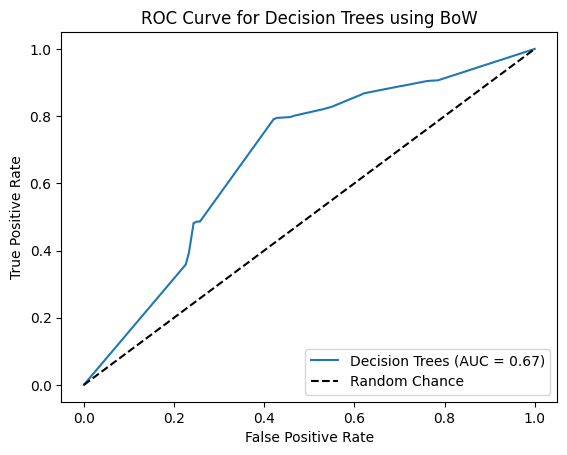

In [315]:
# ROC curve for Decision Trees using BoW
fpr, tpr, _ = roc_curve(y_test, y_dtpredict_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Trees (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees using BoW')
plt.legend(loc='lower right')
plt.show()

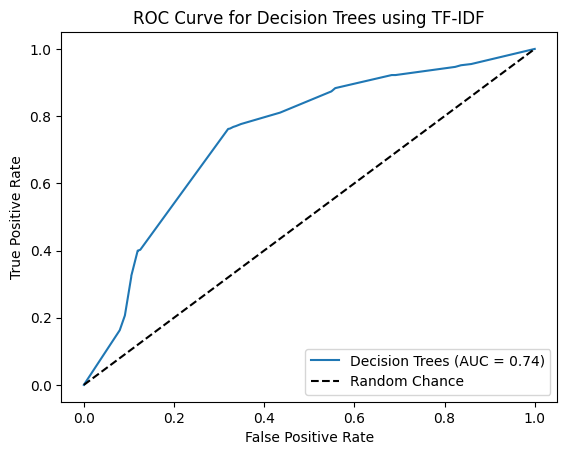

In [316]:
# ROC curve for Decision Trees using TF-IDF
fpr, tpr, _ = roc_curve(y_test, y_dtpredict_proba1)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Trees (AUC = {dt_roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees using TF-IDF')
plt.legend(loc='lower right')
plt.show()

**Classification Report:**

In [317]:
# Classificaion report using Bag of words
dt_bow_report = classification_report(y_test, dt_bow_predict)
print("Classfication Report for Decision trees using Bag of Words:\n",dt_bow_report)

# Classification report using tfidf features
dt_tfidf_report = classification_report(y_test, dt_tfidf_predict)
print("Classfication Report for Decision Trees using TF-IDF:\n",dt_tfidf_report)

Classfication Report for Decision trees using Bag of Words:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       703
           1       0.72      0.80      0.75       823

    accuracy                           0.72      1526
   macro avg       0.72      0.71      0.72      1526
weighted avg       0.72      0.72      0.72      1526

Classfication Report for Decision Trees using TF-IDF:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69       703
           1       0.73      0.76      0.75       823

    accuracy                           0.72      1526
   macro avg       0.72      0.72      0.72      1526
weighted avg       0.72      0.72      0.72      1526



**Confusion Matrix:**

Confusion Matrix for Decision Trees using Bag of Words:
[[444 259]
 [167 656]]


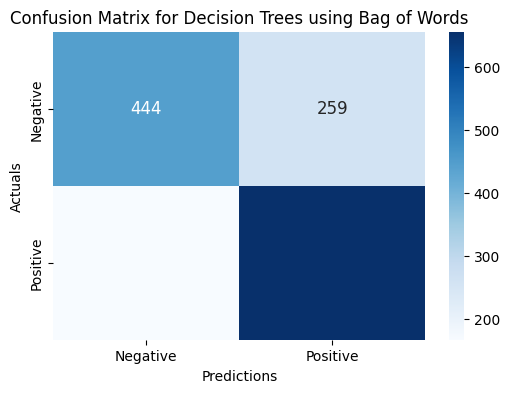

In [318]:
# Compute confusion matrix for Decision Trees bag of words
dt_bow_cm = confusion_matrix(y_test, dt_bow_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for Decision Trees using Bag of Words:")
print(dt_bow_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(dt_bow_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for Decision Trees using Bag of Words')
plt.show()

Confusion Matrix for Decision Trees using TF-IDF:
[[475 228]
 [195 628]]


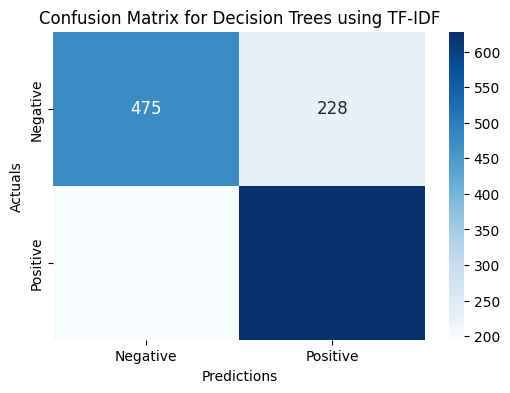

In [319]:
# Compute confusion matrix for Decision Trees using TF-IDF
dt_tfidf_cm = confusion_matrix(y_test, dt_tfidf_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for Decision Trees using TF-IDF:")
print(dt_tfidf_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(dt_tfidf_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for Decision Trees using TF-IDF')
plt.show()

## Random Forest model training and evaluation using Bag of Words and TF-IDF features:

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
# Building the Model
#rfc = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=5,min_samples_leaf=4,random_state=42)
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
#rfc = RandomForestClassifier(n_estimators=0)

In [396]:
# Fitting the model for Bag of words
rfc.fit(vectorized_training_data, y_train)

# Predicting the model for bag of words
rfc_bow_predict = rfc.predict(vectorized_test_data)

In [397]:
# Fitting the model for tfidf features
rfc.fit(wghted_training_data, y_train)

# Predicting the model for tfidf features
rfc_tfidf_predict = rfc.predict(wghted_test_data)

In [398]:
print(rfc.score(vectorized_training_data, y_train))
print(rfc.score(vectorized_test_data, y_test))
print("\n")
print(rfc.score(wghted_training_data, y_train))
print(rfc.score(wghted_test_data, y_test))

0.9568852459016394
0.790956749672346


1.0
0.8237221494102228


In [399]:
# Accuracy score for bag of words
rfc_bow_score = accuracy_score(y_test, rfc_bow_predict)
print("Random Forest model accuracy using Bag of Words:",rfc_bow_score)

# Accuracy score for TF-IDF
rfc_tfidf_score = accuracy_score(y_test, rfc_tfidf_predict)
print("Random Forest model accuracy using TF-IDF:",rfc_tfidf_score)

Random Forest model accuracy using Bag of Words: 0.8296199213630406
Random Forest model accuracy using TF-IDF: 0.8237221494102228


In [400]:
# Predict probabilities for the positive class
y_rfpredict_proba = rfc.predict_proba(vectorized_test_data)[:, 1]
y_rfpredict_proba1 =rfc.predict_proba(wghted_test_data)[:, 1]

In [401]:
# ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, y_rfpredict_proba)
print("ROC-AUC Score:", rf_roc_auc)

ROC-AUC Score: 0.9019918108298233


In [402]:
# ROC-AUC score
rf_roc_auc1 = roc_auc_score(y_test, y_rfpredict_proba1)
print("ROC-AUC Score:", rf_roc_auc1)

ROC-AUC Score: 0.9039656462755523


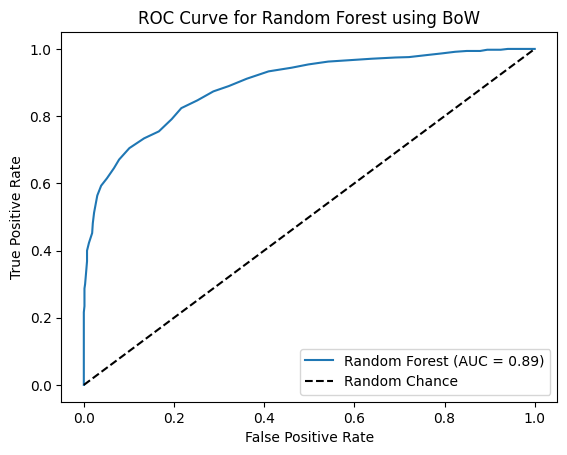

In [374]:
# ROC curve for Random Forest using BoW
fpr, tpr, _ = roc_curve(y_test, y_rfpredict_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest using BoW')
plt.legend(loc='lower right')
plt.show()

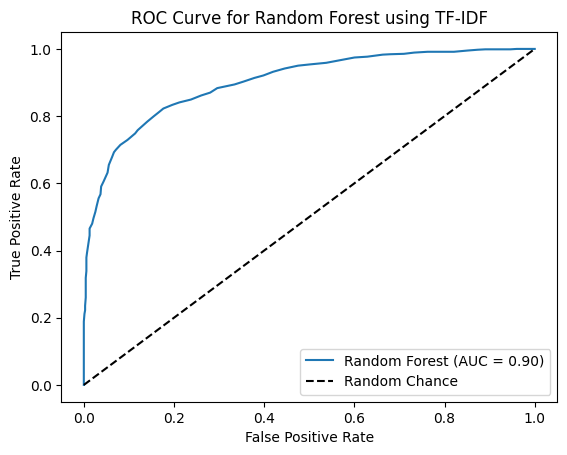

In [375]:
# ROC curve for Random Forest using TF-IDF
fpr, tpr, _ = roc_curve(y_test, y_rfpredict_proba1)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest using TF-IDF')
plt.legend(loc='lower right')
plt.show()

**Classification Report:**

In [376]:
# Classificaion report using Bag of words
rfc_bow_report = classification_report(y_test, rfc_bow_predict)
print("Classfication Report for Random Forest using Bag of Words:\n",rfc_bow_report)

# Classification report using tfidf features
rfc_tfidf_report = classification_report(y_test, rfc_tfidf_predict)
print("Classfication Report for Random Forest using TF-IDF:\n",rfc_tfidf_report)

Classfication Report for Random Forest using Bag of Words:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       703
           1       0.86      0.80      0.83       823

    accuracy                           0.82      1526
   macro avg       0.82      0.82      0.82      1526
weighted avg       0.82      0.82      0.82      1526

Classfication Report for Random Forest using TF-IDF:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       703
           1       0.85      0.81      0.83       823

    accuracy                           0.82      1526
   macro avg       0.82      0.82      0.82      1526
weighted avg       0.82      0.82      0.82      1526



Confusion Matrix for Random Forest using Bag of Words:
[[596 107]
 [166 657]]


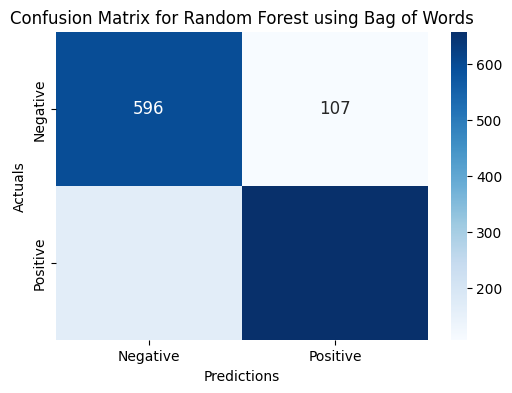

In [377]:
# Compute confusion matrix for Random Forest using bag of words
rfc_bow_cm = confusion_matrix(y_test, rfc_bow_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for Random Forest using Bag of Words:")
print(rfc_bow_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rfc_bow_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for Random Forest using Bag of Words')
plt.show()

Confusion Matrix for Random Forest using TF-IDF:
[[586 117]
 [155 668]]


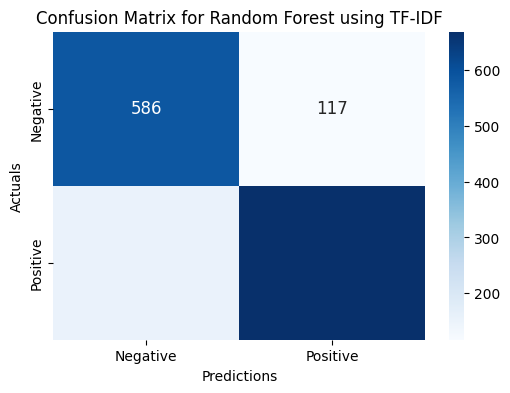

In [378]:
# Compute confusion matrix for Random Forest using TF-IDF
rfc_tfidf_cm = confusion_matrix(y_test, rfc_tfidf_predict)

class_labels = ["Negative","Positive"]
numeric_labels = [0,1]

# Print confusion matrix
print("Confusion Matrix for Random Forest using TF-IDF:")
print(rfc_tfidf_cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rfc_tfidf_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for Random Forest using TF-IDF')
plt.show()